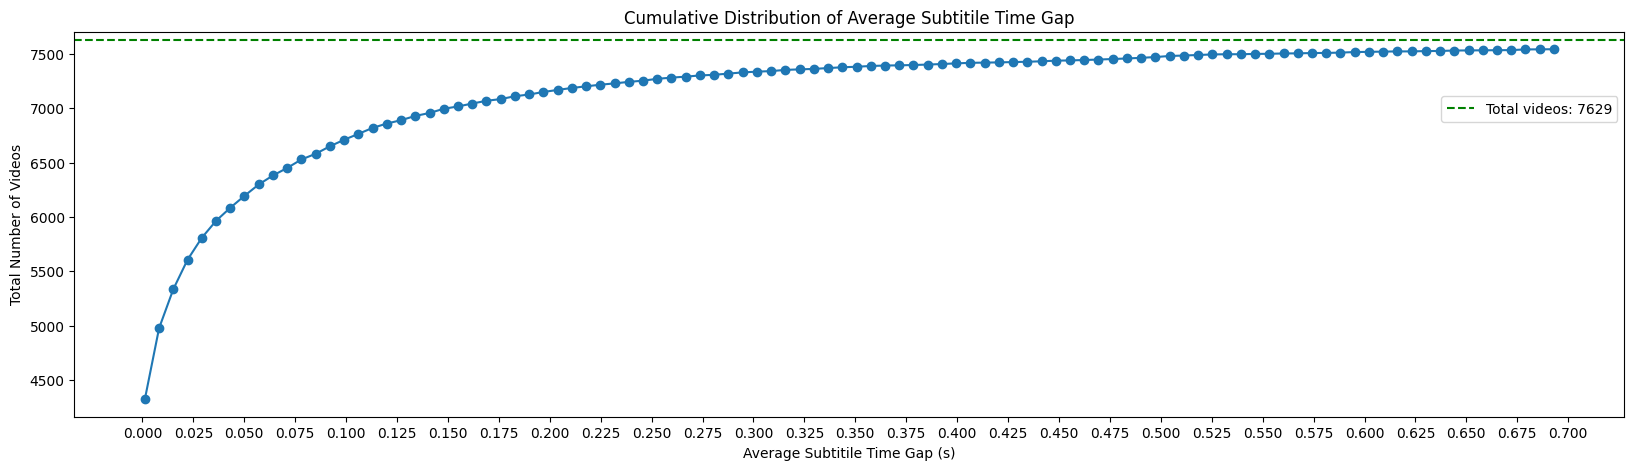

In [41]:
import json
import numpy as np
import matplotlib.pyplot as plt

def is_non_speaking_subtitle(subtitle):
    return subtitle.startswith('[') and subtitle.endswith(']')

input_file_name = "/Users/jackgengqc/Desktop/yttemporal1b_train_0000of1024.jsonl"

mean_time_deltas = []

# Process each line in the JSONL file
with open(input_file_name, 'r') as input_file:
    for line in input_file:
        data = json.loads(line)
        
        duration = data["duration"]
        if duration < 420:
            continue
        
        subtitles_t_start = data["subtitles_t_start"]
        subtitles_t_end = data["subtitles_t_end"]
        subtitles_words = data["subtitles_words"]

        # Calculate time deltas between consecutive words but skip "[Music]"
        time_deltas = []
        i = 0
        while i < len(subtitles_words) - 1:
            if is_non_speaking_subtitle(subtitles_words[i+1]):
                if i+2 < len(subtitles_t_start):  # Check if there's a word after the non-speaking subtitle
                    time_deltas.append(subtitles_t_start[i+2] - subtitles_t_end[i])
                    i += 2  # Skip the non-speaking subtitle and move to the next word
                else:
                    break
            else:
                time_deltas.append(subtitles_t_start[i+1] - subtitles_t_end[i])
                i += 1
        
        mean_time_delta = np.mean(time_deltas)
        mean_time_deltas.append(mean_time_delta)

# Histogram calculation with the given intervals
min_val = min(mean_time_deltas)
max_val = 0.7
interval_count = 100
interval_size = (max_val - min_val) / interval_count

counts = [0] * interval_count
for delta in mean_time_deltas:
    if min_val <= delta < max_val:  # Make sure delta is within the specified range
        idx = int((delta - min_val) / interval_size)
        if idx == interval_count:  # To handle the max value
            idx -= 1
        counts[idx] += 1

cumulative_counts = np.cumsum(counts)
total_videos = len(mean_time_deltas)  # Calculate the total number of videos

# Plotting
bin_edges = [min_val + i * interval_size for i in range(interval_count + 1)]
plt.figure(figsize=(20, 5))  # Adjust the figure size
plt.plot(bin_edges[:-1], cumulative_counts, marker='o', linestyle='-')

plt.title('Cumulative Distribution of Average Subtitile Time Gap')
plt.xlabel('Average Subtitile Time Gap (s)')
plt.ylabel('Total Number of Videos')

# Adjust x-axis ticks
ticks = np.arange(0, max_val + 0.025, 0.025)  # Create ticks from 0 to max_val at intervals of 0.05
plt.xticks(ticks)

# Draw a dashed horizontal line representing the total number of videos
plt.axhline(total_videos, color='green', linestyle='--', label=f'Total videos: {total_videos}')

# Position the legend below the dashed line. Adjusting the "bbox_to_anchor" values can fine-tune the position.
plt.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
plt.grid(False)
# plt.show()

plt.savefig("cumulative_distribution_plot.png")



In [17]:
print(intervals)
print(max_val)
print(mean_time_deltas)

[0.0011897307451470232, 0.0557176183839321, 0.11024550602271718, 0.16477339366150226, 0.21930128130028734, 0.2738291689390724, 0.32835705657785746, 0.38288494421664254, 0.4374128318554276, 0.4919407194942127, 0.5464686071329978, 0.6009964947717829, 0.655524382410568, 0.7100522700493531, 0.7645801576881381, 0.8191080453269232, 0.8736359329657083, 0.9281638206044934, 0.9826917082432785, 1.0372195958820634, 1.0917474835208485, 1.1462753711596336, 1.2008032587984185, 1.2553311464372037, 1.3098590340759888, 1.364386921714774, 1.418914809353559, 1.473442696992344, 1.5279705846311291, 1.5824984722699142, 1.6370263599086992, 1.6915542475474843, 1.7460821351862694, 1.8006100228250546, 1.8551379104638397, 1.9096657981026246, 1.9641936857414097, 2.018721573380195, 2.07324946101898, 2.1277773486577654, 2.1823052362965503, 2.236833123935335, 2.2913610115741205, 2.3458888992129054, 2.4004167868516904, 2.4549446744904757, 2.5094725621292606, 2.564000449768046, 2.618528337406831, 2.673056225045616, 2.

Graph -> [0: all] -> [0 + interval: ~80%] -> ... ~100 intervals?

"subtitle_words": [..., "Hello", "[Music]", "world", ...]
"subtitle_t_start": [..., 11.20, 11.40, 11.80, ...]
"subtitle_t_end": [..., 11.30, 11.70, 11.90, ...]


time_delta = 